In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [40]:
ip_temp=ctrl.Antecedent(np.arange(0,51,1),'input_temp')
hum=ctrl.Antecedent(np.arange(0,101,1),'humidity')
op_temp=ctrl.Consequent(np.arange(20,36),'output_temp')

In [41]:
ip_temp.automf(3)
hum.automf(3)

In [42]:
op_temp['low']=fuzz.trimf(op_temp.universe,[0,0,25])
op_temp['medium']=fuzz.trimf(op_temp.universe,[0,25,35])
op_temp['high']=fuzz.trimf(op_temp.universe,[25,35,35])

c:\users\swaraj badhei\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


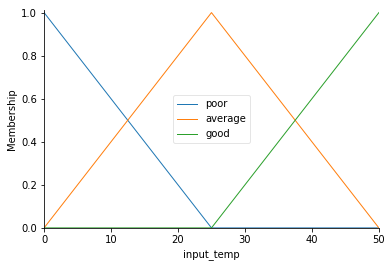

In [43]:
ip_temp.view()

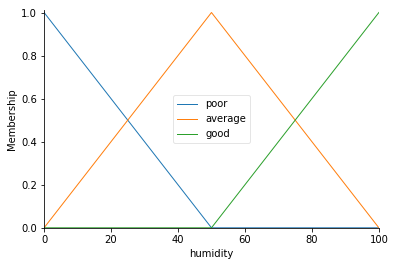

In [44]:
hum.view()

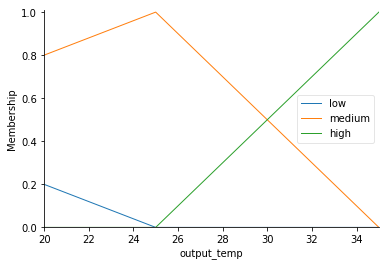

In [45]:
op_temp.view()

In [46]:
rule1=ctrl.Rule(ip_temp['poor']|hum['poor'],op_temp['low'])
rule2=ctrl.Rule(ip_temp['poor']|hum['good'],op_temp['high'])
rule3=ctrl.Rule(ip_temp['good']|hum['average'],op_temp['low'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25a02391860>)

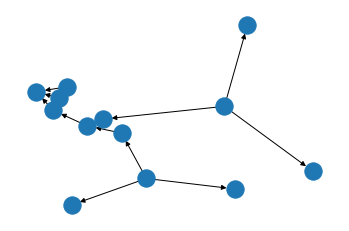

In [47]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25a0277c3c8>)

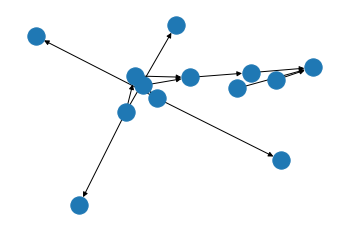

In [48]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25a0258b080>)

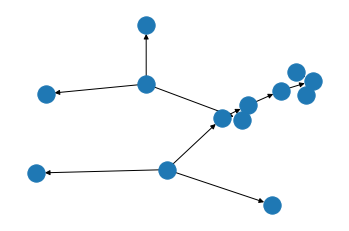

In [49]:
rule3.view()

In [50]:
#control system
temp=ctrl.ControlSystem([rule1,rule2,rule3])
temperature=ctrl.ControlSystemSimulation(temp)

In [51]:
temperature.input['input_temp']=30
temperature.input['humidity']=60

In [52]:
temperature.compute()

In [53]:
temperature.output['output_temp']

28.56521739130435